# Inflation Indexes and Curves 2 (Quantlib comparison)

This guide replicates and is a comparison to the Quantlib tutorial page at
https://www.quantlibguide.com/Inflation%20indexes%20and%20curves.html

## Inflation Indexes

Historical index fixings in *rateslib* should be indexed to the 1st of the appropriate inflation month.

In [1]:
from rateslib import *
from pandas import Series

In [2]:
inflation_fixings = [
    (dt(2022, 1, 1), 110.70),
    (dt(2022, 2, 1), 111.74),
    (dt(2022, 3, 1), 114.46),
    (dt(2022, 4, 1), 115.11),
    (dt(2022, 5, 1), 116.07),
    (dt(2022, 6, 1), 117.01),
    (dt(2022, 7, 1), 117.14),
    (dt(2022, 8, 1), 117.85),
    (dt(2022, 9, 1), 119.26),
    (dt(2022, 10, 1), 121.03),
    (dt(2022, 11, 1), 120.95),
    (dt(2022, 12, 1), 120.52),
    (dt(2023, 1, 1), 120.27),
    (dt(2023, 2, 1), 121.24),
    (dt(2023, 3, 1), 122.34),
    (dt(2023, 4, 1), 123.12),
    (dt(2023, 5, 1), 123.15),
    (dt(2023, 6, 1), 123.47),
    (dt(2023, 7, 1), 123.36),
    (dt(2023, 8, 1), 124.03),
    (dt(2023, 9, 1), 124.43),
    (dt(2023, 10, 1), 124.54),
    (dt(2023, 11, 1), 123.85),
    (dt(2023, 12, 1), 124.05),
    (dt(2024, 1, 1), 123.60),
    (dt(2024, 2, 1), 124.37),
    (dt(2024, 3, 1), 125.31),
    (dt(2024, 4, 1), 126.05),
]
dates, values = zip(*inflation_fixings)
fixings = Series(values, dates)

*Rateslib* contains an `index_value` method that will determine such for a given reference value date and other common parameters.

In [3]:
index_value(
    index_lag=0,
    index_method="monthly",
    index_fixings=fixings,
    index_date=dt(2024, 3, 15)
)

np.float64(125.31)

For example to replicate the *Quantlib* example of a lagged reference date we can use:

In [4]:
index_value(
    index_lag=3,
    index_method="daily",
    index_fixings=fixings,
    index_date=dt(2024, 5, 15)
)

np.float64(124.79451612903226)

## Inflation Curves

Create a nominal discount curve for cashflows. Calibrated to a 3% continuously compounded rate.

In [5]:
nominal_curve = Curve(
    nodes={dt(2024, 5, 11): 1.0, dt(2074, 5, 18): 1.0},
    interpolation="log_linear",
    convention="Act365F",
    id="discount"
)
solver1 = Solver(
    curves=[nominal_curve],
    instruments=[Value(dt(2074, 5, 11), metric="cc_zero_rate", curves="discount")],
    s=[3.0],
    id="rates",
    instrument_labels=["nominal"],
)

SUCCESS: `func_tol` reached after 8 iterations (levenberg_marquardt), `f_val`: 4.2178219398368675e-19, `time`: 0.0071s


Now create an inflation curve, based on the last known CPI print, calibrated with zero coupon inflation swaps rates. Notice that an inflation curve starts as of the last known fixing as its `index_base`. This is similar to *Quantlib*, not be design, but by necessity since this is the only information we have that can define the start of the curve.

In [6]:
inflation_curve = Curve(
    nodes={
        dt(2024, 4, 1): 1.0,  # <- last known inflation print.
        dt(2025, 5, 11): 1.0,  # 1y
        dt(2026, 5, 11): 1.0,  # 2y
        dt(2027, 5, 11): 1.0,  # 3y
        dt(2028, 5, 11): 1.0,  # 4y
        dt(2029, 5, 11): 1.0,  # 5y
        dt(2031, 5, 11): 1.0,  # 7y
        dt(2034, 5, 11): 1.0,  # 10y
        dt(2036, 5, 11): 1.0,  # 12y
        dt(2039, 5, 11): 1.0,  # 15y
        dt(2044, 5, 11): 1.0,  # 20y
        dt(2049, 5, 11): 1.0,  # 25y
        dt(2054, 5, 11): 1.0,  # 30y
        dt(2064, 5, 11): 1.0,  # 40y
        dt(2074, 5, 11): 1.0,  # 50y
    },
    interpolation="log_linear",
    convention="Act365F",
    index_base=126.05,
    index_lag=0,
    id="inflation"
)
solver = Solver(
    pre_solvers=[solver1],
    curves=[inflation_curve],
    instruments=[
        ZCIS(dt(2024, 5, 11), "1y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "2y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "3y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "4y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "5y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "7y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "10y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "12y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "15y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "20y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "25y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "30y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "40y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "50y", spec="eur_zcis", curves=["inflation", "discount"], leg2_index_fixings=fixings),
    ],
    s=[2.93, 2.95, 2.965, 2.98, 3.0, 3.06, 3.175, 3.243, 3.293, 3.338, 3.348, 3.348, 3.308, 3.228],
    instrument_labels=["1y", "2y", "3y", "4y", "5y", "7y", "10y", "12y", "15", "20y", "25y", "30y", "40y", "50y"],
    id="zcis",
)       

SUCCESS: `func_tol` reached after 8 iterations (levenberg_marquardt), `f_val`: 1.4302416694642844e-17, `time`: 0.0439s


The data can be output to a table or plotted as below.

(<Figure size 640x480 with 1 Axes>,
 <Axes: >,
 [<matplotlib.lines.Line2D at 0x10e14d950>])

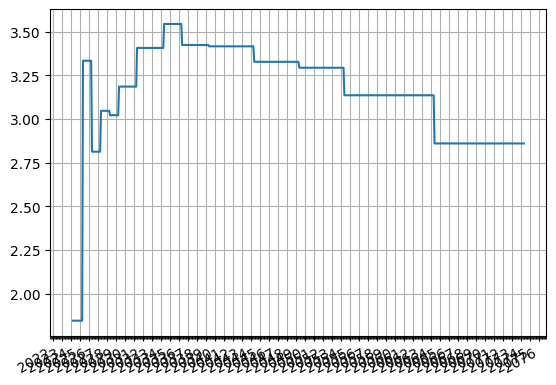

In [7]:
inflation_curve.plot("1m")

Some of the forecast values from the curve can be obtained directly from *Curve* methods.

In [8]:
inflation_curve.index_value(dt(2027, 4, 1), index_lag=3, interpolation="monthly")

<Dual: 135.440324, (inflation0, inflation1, inflation2, ...), [-0.0, -0.0, -50.9, ...]>

In [9]:
inflation_curve.index_value(dt(2027, 4, 1), index_lag=0, interpolation="monthly")

<Dual: 136.382058, (inflation0, inflation1, inflation2, ...), [-0.0, -0.0, -15.8, ...]>

In [10]:
inflation_curve.index_value(dt(2027, 5, 15), index_lag=3, interpolation="monthly")

<Dual: 135.763963, (inflation0, inflation1, inflation2, ...), [-0.0, -0.0, -38.9, ...]>

## Seasonality

The way *rateslib* handles seasonality is to replicate it via its *CompositeCurve* framework.
If we create a *Curve* with **nodes** replicating factors we might create something like:
    

In [11]:
seasonality = Curve(
    nodes={
        dt(2024, 4, 1): 1.0,
        dt(2025, 3, 1): 1.0,
        dt(2025, 4, 1): 1.0,
        dt(2025, 5, 1): 1.0,
        dt(2025, 6, 1): 1.0,
        dt(2025, 7, 1): 1.0,
        dt(2074, 5, 11): 1.0
    },
    convention="Act365F",
    id="season"
)
solver_s2 = Solver(
    curves=[seasonality],
    instruments=[
        Value(dt(2024, 4, 1), curves="season", metric="o/n_rate"),
        Value(dt(2025, 3, 1), curves="season", metric="o/n_rate"),
        Value(dt(2025, 4, 1), curves="season", metric="o/n_rate"),
        Value(dt(2025, 5, 1), curves="season", metric="o/n_rate"),
        Value(dt(2025, 6, 1), curves="season", metric="o/n_rate"),
        Value(dt(2025, 7, 1), curves="season", metric="o/n_rate"),
    ],
    s=[0.0, -0.3, 0.3, -0.4, 0.4, 0.0],
    instrument_labels=["s0", "s1", "s2", "s3", "s4", "s5"],
    id="seasonality",
)

SUCCESS: `func_tol` reached after 5 iterations (levenberg_marquardt), `f_val`: 6.966362122021486e-12, `time`: 0.0071s


(<Figure size 640x480 with 1 Axes>,
 <Axes: >,
 [<matplotlib.lines.Line2D at 0x10f34b4d0>])

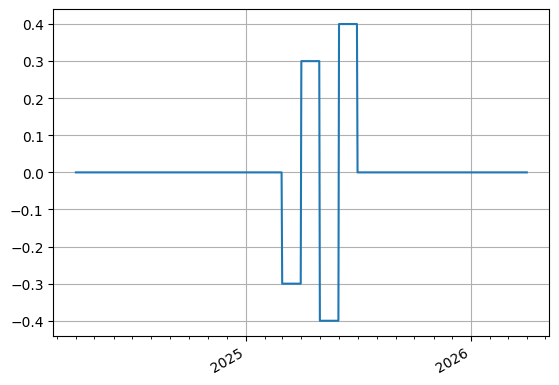

In [12]:
seasonality.plot("1b", right=dt(2026, 4, 1))

(<Figure size 640x480 with 1 Axes>,
 <Axes: >,
 [<matplotlib.lines.Line2D at 0x10f5dec10>])

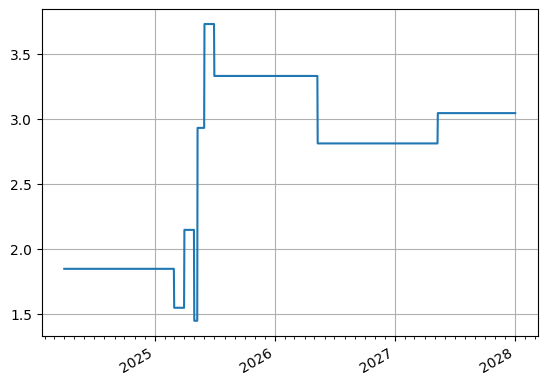

In [13]:
adjusted_inflation = CompositeCurve(curves=[inflation_curve, seasonality], id="adj_inflation")
adjusted_inflation.plot("1b", right=dt(2028, 1, 1))

In [14]:
solver = Solver(
    pre_solvers=[solver1, solver_s2],
    curves=[adjusted_inflation, inflation_curve],
    instruments=[
        ZCIS(dt(2024, 5, 11), "1y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "2y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "3y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "4y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "5y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "7y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "10y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "12y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "15y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "20y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "25y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "30y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "40y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
        ZCIS(dt(2024, 5, 11), "50y", spec="eur_zcis", curves=["adj_inflation", "discount"], leg2_index_fixings=fixings),
    ],
    s=[2.93, 2.95, 2.965, 2.98, 3.0, 3.06, 3.175, 3.243, 3.293, 3.338, 3.348, 3.348, 3.308, 3.228],
    instrument_labels=["1y", "2y", "3y", "4y", "5y", "7y", "10y", "12y", "15", "20y", "25y", "30y", "40y", "50y"],
    id="zcis",
)    

SUCCESS: `func_tol` reached after 4 iterations (levenberg_marquardt), `f_val`: 1.0300554017220054e-13, `time`: 0.0299s


We sample a few dates

In [15]:
f1 = adjusted_inflation.index_value(dt(2025, 3, 1), index_lag=0)
f2 = adjusted_inflation.index_value(dt(2025, 4, 1), index_lag=0)
f3 = adjusted_inflation.index_value(dt(2025, 5, 1), index_lag=0)
f4 = adjusted_inflation.index_value(dt(2025, 6, 1), index_lag=0)
print(float(f1), float(f2), float(f3), float(f4))

128.19527824617822 128.36352410657304 128.58994830252666 128.8580493924425


These values compare to the underlying, non-seasonaility adjusted curves as follows:

In [16]:
f1 = inflation_curve.index_value(dt(2025, 3, 1), index_lag=0)
f2 = inflation_curve.index_value(dt(2025, 4, 1), index_lag=0)
f3 = inflation_curve.index_value(dt(2025, 5, 1), index_lag=0)
f4 = inflation_curve.index_value(dt(2025, 6, 1), index_lag=0)
print(float(f1), float(f2), float(f3), float(f4))

128.1952781881416 128.39623301907898 128.5910053629069 128.9028908233816


The trick here is obviously to find a representation of a `seasonaility` curve that matches one's expectation of seasonality adjustments. Here, a `Solver` calibration was used to separately solve the `seasonality` curve to inflation rate adjustments.

## Inflation Swap and DV01

We can easily construct a ZCIS or other type of inflation based *instrument* and use the native `delta` and `gamma` methods associated with a `Solver` to extract risk sensitivities.

In [17]:
zcis = ZCIS(dt(2024, 3, 11), "4y", spec="eur_zcis", curves=["adj_inflation", "discount"], fixed_rate=3.0, leg2_index_fixings=fixings)

In [18]:
zcis.rate(solver=solver)

<Dual: 2.913238, (inflation0, inflation1, inflation2, ...), [0.0, 0.0, 0.0, ...]>

In [19]:
zcis.npv(solver=solver)

<Dual: -3369.848948, (inflation0, inflation1, inflation2, ...), [0.0, 0.0, 0.0, ...]>

In [20]:
zcis.delta(solver=solver).style.format(precision=0)

In [21]:
zcis.gamma(solver=solver).style.format(precision=1)